# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Azka Ravindra Rahman
- **Email:** azkaravindra@gmail.com
- **ID Dicoding:** poliwag

## Menentukan Pertanyaan Bisnis

- Bagaimana kondisi cuaca mempengaruhi jumlah peminjaman sepeda pada hari kerja setiap jamnya?
- Pada pukul berapa casual user paling banyak meminjam sepeda di workingday pada musim summer?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [27]:
from google.colab import files

uploaded = files.upload()

Saving day.csv to day (1).csv
Saving hour.csv to hour (1).csv


In [28]:
day_df = pd.read_csv("day.csv", delimiter = ',')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [29]:
hour_df = pd.read_csv("hour.csv", delimiter = ',')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data



#### Tabel day_df

Disini kita akan melakukan pengecekan pada dataframe day_df dan hour_df apakah terdapat data yang terduplikasi atau data yang missing value.

In [40]:
print("Data yang terduplikasi :\n ", day_df.duplicated().sum())
print()
print("Data yang missing value :\n", day_df.isna().sum())

Data yang terduplikasi :
  0

Data yang missing value :
 instant            0
dteday             0
season             0
yr                 0
mnth               0
holiday            0
weekday            0
workingday         0
weathersit         0
temp               0
atemp              0
hum                0
windspeed          0
casual_user        0
registered_user    0
total_user         0
dtype: int64


Kita menggunakan fungsi '.info()' untuk memeriksa tipe data dari setiap kolom yang ada pada dataset

In [41]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant          731 non-null    int64         
 1   dteday           731 non-null    datetime64[ns]
 2   season           731 non-null    object        
 3   yr               731 non-null    int64         
 4   mnth             731 non-null    int64         
 5   holiday          731 non-null    int64         
 6   weekday          731 non-null    int64         
 7   workingday       731 non-null    object        
 8   weathersit       731 non-null    object        
 9   temp             731 non-null    float64       
 10  atemp            731 non-null    float64       
 11  hum              731 non-null    float64       
 12  windspeed        731 non-null    float64       
 13  casual_user      731 non-null    int64         
 14  registered_user  731 non-null    int64    

In [42]:
day_df.describe()

,instant,yr,mnth,holiday,weekday,temp,atemp,hum,windspeed,casual_user,registered_user,total_user
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2011.500684,6.519836,0.028728,2.997264,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,3.451913,0.167155,2.004787,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,2011.000000,1.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011.000000,4.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012.000000,7.000000,0.000000,3.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012.000000,10.000000,0.000000,5.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012.000000,12.000000,1.000000,6.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000




#### Tabel hour_df

In [43]:
print("Data yang terduplikasi :\n ", hour_df.duplicated().sum())
print()
print("Data yang missing value :\n", hour_df.isna().sum())

Data yang terduplikasi :
  0

Data yang missing value :
 instant            0
dteday             0
season             0
yr                 0
mnth               0
hr                 0
holiday            0
weekday            0
workingday         0
weathersit         0
temp               0
atemp              0
hum                0
windspeed          0
casual_user        0
registered_user    0
total_user         0
dtype: int64


In [44]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant          17379 non-null  int64  
 1   dteday           17379 non-null  object 
 2   season           17379 non-null  object 
 3   yr               17379 non-null  int64  
 4   mnth             17379 non-null  int64  
 5   hr               17379 non-null  int64  
 6   holiday          17379 non-null  int64  
 7   weekday          17379 non-null  int64  
 8   workingday       17379 non-null  object 
 9   weathersit       17379 non-null  object 
 10  temp             17379 non-null  float64
 11  atemp            17379 non-null  float64
 12  hum              17379 non-null  float64
 13  windspeed        17379 non-null  float64
 14  casual_user      17379 non-null  int64  
 15  registered_user  17379 non-null  int64  
 16  total_user       17379 non-null  int64  
dtypes: float64(4

In [45]:
hour_df.describe()

,instant,yr,mnth,hr,holiday,weekday,temp,atemp,hum,windspeed,casual_user,registered_user,total_user
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2011.502561,6.537775,11.546752,0.028770,3.003683,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,0.500008,3.438776,6.914405,0.167165,2.005771,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,2011.000000,1.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011.000000,4.000000,6.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012.000000,7.000000,12.000000,0.000000,3.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012.000000,10.000000,18.000000,0.000000,5.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012.000000,12.000000,23.000000,1.000000,6.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Setelah melakukan pemeriksaan pada kedua dataframe, dapat kita simpulkan bahwa tidak terdapat data yang terduplikasi dan juga tidak ada data yang missing value. Akan tetapi, terdapat kolom yang bentuk datanya tidak sesuai, yaitu dteday.

### Cleaning Data

Mengubah data type 'dteday' dari sebuah objek menjadi data type datetime.

In [36]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

Disini juga kita akan mengubah nama kolom agar tidak ambigu menggunakan fungsi 'rename()'.

In [37]:
day_df.rename(columns={'casual':'casual_user', 'registered':'registered_user', 'cnt':'total_user'}, inplace=True)
hour_df.rename(columns={'casual':'casual_user', 'registered':'registered_user', 'cnt':'total_user'}, inplace=True)

Setelah itu, karena masih terdapat value data yang ambigu, maka kita akan mengubahnya sesuai dengan catatan yang ada di file README.md. Disini kita akan mengubahnya menggunakan dictionary. Hal ini dilakukan agar dataframe dapat lebih mudah dibaca.

In [38]:
season_mapping = {1: 'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
year_mapping = {0: 2011, 1:2012}
weather_mapping = {1: 'Clear/Few clouds', 2: 'Misty/Cloudy', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow/Fog'}
working_day_mapping = {1: 'True', 0: 'False'}


day_df['season'].replace(season_mapping, inplace = True)
day_df['yr'].replace(year_mapping, inplace = True)
day_df['weathersit'].replace(weather_mapping, inplace = True)
day_df['workingday'].replace(working_day_mapping, inplace = True)

hour_df['season'].replace(season_mapping, inplace = True)
hour_df['yr'].replace(year_mapping, inplace = True)
hour_df['weathersit'].replace(weather_mapping, inplace = True)
hour_df['workingday'].replace(working_day_mapping, inplace = True)



In [39]:
day_df.head()
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,Spring,2011,1,0,0,6,False,Clear/Few clouds,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,1,1,0,6,False,Clear/Few clouds,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,1,2,0,6,False,Clear/Few clouds,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,1,3,0,6,False,Clear/Few clouds,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,1,4,0,6,False,Clear/Few clouds,0.24,0.2879,0.75,0.0,0,1,1


Dapat kita lihat bahwa valuenya sudah berubah dari yang hanya berbentuk numerik, sekarang menjadi value dengan maknanya yang sesuai.

## Exploratory Data Analysis (EDA)

### Explore ...

Pada tahap ini, kita akan mengeksplore lebih dalam mengenai dataset yang digunakan. Hal ini bertujuan untuk mendapatkan wawasan lebih tentang data dan juga untuk mencoba mencari jawaban dari pertanyaan yang telah diformulasikan.

Pertama, kita akan mengelompokkan jumlah pengguna, baik itu casual user, registered user, ataupun total user berdasarkan bulan. Hal ini akan dilakukan dengan menggunakan fungsi 'agg()'.

In [46]:
day_df.groupby(by='mnth').agg({
    "casual_user":"sum",
    "registered_user":"sum",
    "total_user":"sum"
})

,casual_user,registered_user,total_user
mnth,,,
1,12042,122891,134933
2,14963,136389,151352
3,44444,184476,228920
4,60802,208292,269094
5,75285,256401,331686
6,73906,272436,346342
7,78157,266791,344948
8,72039,279155,351194
9,70323,275668,345991


Setelah itu, kita akan mengelompokkan casual user, registered user, ataupun total user berdasarkan musim. Sama halnya dengan cell sebelumnya, kita menggunakan fungsi '.agg()', namun ditambah dengan fungsi '.sort_values()' agar data dapat dibaca dari musim yang paling banyak penggunanya sampai yang paling sedikit.

In [47]:
day_df.groupby(by='season').agg({
    "casual_user":"sum",
    "registered_user":"sum",
    "total_user":"sum"
}).sort_values(by='total_user', ascending=False)

,casual_user,registered_user,total_user
season,,,
Fall,226091,835038,1061129
Summer,203522,715067,918589
Winter,129782,711831,841613
Spring,60622,410726,471348


Lalu yang terakhir, kita akan mengelompokkan berdasarkan kondisi cuacanya. Tahap ini akan membantu kita dalam menjawab pertanyaan kedua.

In [48]:
day_df.groupby(by='weathersit').agg({
    'casual_user':'sum',
    'registered_user':'sum',
    'total_user':'sum'
}).sort_values(by='total_user', ascending=False)

,casual_user,registered_user,total_user
weathersit,,,
Clear/Few clouds,446346,1811606,2257952
Misty/Cloudy,169776,827082,996858
Light Rain/Snow,3895,33974,37869


Setelah kita sudah melakukan tahap diatas, dapat disimpulkan bahwa:         

*   Bulan yang memiliki jumlah pengguna paling banyak adalah bulan 8, yaitu Agustus sebanyak 351194. Sedangkan bulan yang memiliki jumlah pengguna paling sedikit adalah bulan 1, yaitu Januari sebanyak 134933
*   Musim yang memiliki jumlah pengguna paling banyak adalah musim 'Fall' sebanyak 1061129. Sedangkan musim yang memiliki jumlah pengguna paling sedikit adalah musim 'Spring' sebanyak 471348.
*   Kondisi cuaca yang memiliki jumlah pengguna paling banyak adalah ketika kondisi cuaca sedang 'Clear/Few clouds' sebanyak 2257952. Sedangkan kondisi cuaca yang memiliki jumlah pengguna paling sedikit adalah ketika kondisi cuaca sedang 'Light Rain/Snow' sebanyak 37869.



## Visualization & Explanatory Analysis

Pada tahap ini, kita akan menjawab pertanyaan yang sudah diformulasikan diawal dan menjelaskannya dengan konten visual dan penjelasannya.

### Pertanyaan 1: Bagaimana kondisi cuaca mempengaruhi jumlah peminjaman sepeda pada hari kerja setiap jamnya?

Disini kita akan membuat dataframe baru dengan nilai yang sama seperti dataframe 'hour_df' namun dengan catatan dimana 'workingday' == 'True'. Hal ini akan memfilter data hanya ketika hari kerja saja.

In [49]:
workingday_weather_df = hour_df[(hour_df['workingday']== 'True')]

workingday_weather_df = hour_df.groupby(['hr', 'weathersit']).agg({
    'casual_user':'sum',
    'registered_user':'sum',
    'total_user':'sum'
}).reset_index()


workingday_weather_df

,hr,weathersit,casual_user,registered_user,total_user
0,0,Clear/Few clouds,5589,23341,28930
1,0,Light Rain/Snow,186,1276,1462
2,0,Misty/Cloudy,1600,7138,8738
3,1,Clear/Few clouds,3406,13448,16854
4,1,Heavy Rain/Snow/Fog,1,22,23
...,...,...,...,...,...
70,22,Light Rain/Snow,480,3389,3869
71,22,Misty/Cloudy,3062,16097,19159
72,23,Clear/Few clouds,8127,38112,46239
73,23,Light Rain/Snow,586,2722,3308


Untuk menjelaskannya dalam bentuk visual yang menarik dan mudah dipahami, kita akan menggunakan linechart dimana y-axis adalah jumlah sepeda yang dipinjam, x-axis adalah jamnya dari 0-23, dan garisnya adalah jumlah sepeda dipinjam yang setiap warnanya merepresentasikan kondisi cuaca.

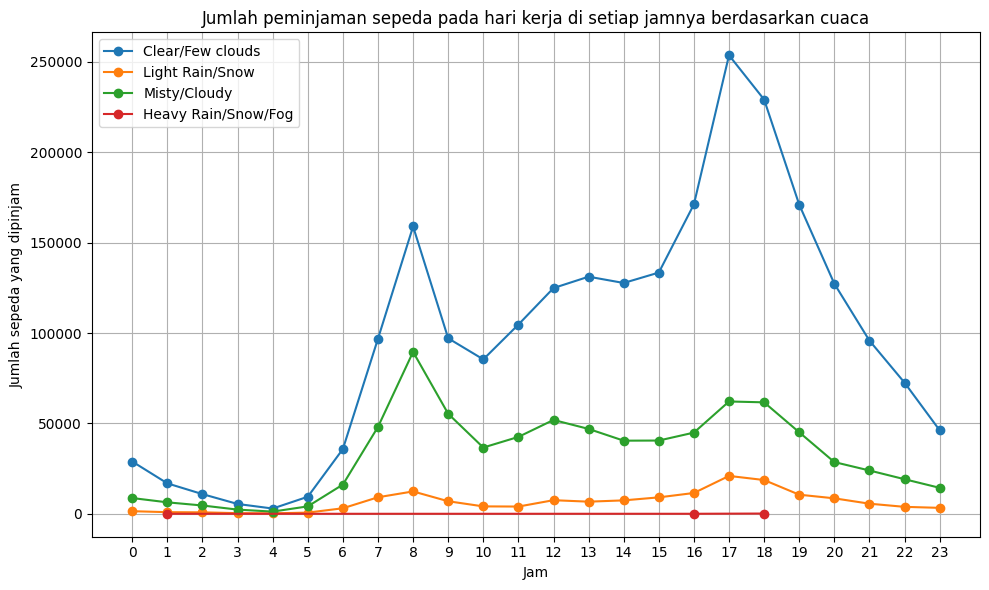

In [50]:
hourly_data = workingday_weather_df.groupby(['hr', 'weathersit']).agg({'total_user': 'sum'}).reset_index()
weather_conditions = hourly_data['weathersit'].unique()
plt.figure(figsize=(10, 6))

for condition in weather_conditions:
    data_subset = hourly_data[hourly_data['weathersit'] == condition]
    plt.plot(data_subset['hr'], data_subset['total_user'], marker='o', label=f'{condition}')

plt.xlabel('Jam')
plt.ylabel('Jumlah sepeda yang dipinjam')
plt.title('Jumlah peminjaman sepeda pada hari kerja di setiap jamnya berdasarkan cuaca')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Dapat dilihat bahwa jumlah peminjaman akan banyak apabila kondisi cuacanya sedang 'Clear/Few clouds' dan akan sangat sedikit ketika kondisi cuacanya sedang 'Heavy Rain/Snow/Fog'.

### Pertanyaan 2: Pada pukul berapa casual user paling banyak meminjam sepeda di workingday pada musim summer?

Untuk menjawab pertanyaan ini, hal pertama yang harus kita lakukan adalah mengurutkan jumlah casual user yang meminjam sepeda berdasarkan jamnya. Dan juga kita harus membuat dataframe baru dimana hanya data yang berkondisi 'workingday' == 'True' dan 'season' == 'Summer' saja yang akan ditampilkan.

In [51]:
workingday_summer_df = hour_df[(hour_df['workingday']== 'True') & (hour_df['season'] == 'Summer')]
result = workingday_summer_df.groupby(by='hr').agg({ 'casual_user':'sum'}).reset_index()
result.set_index('hr', inplace = True)
result

,casual_user
hr,
0,1145
1,701
2,354
3,144
4,119
5,151
6,707
7,1914
8,3367


Setelah itu, kita akan memvisualisasikannya ke bentuk histogram dimana y-axisnya adalah jumlah peminjamanan dan x-axisnya adalah jam dalam sehari.

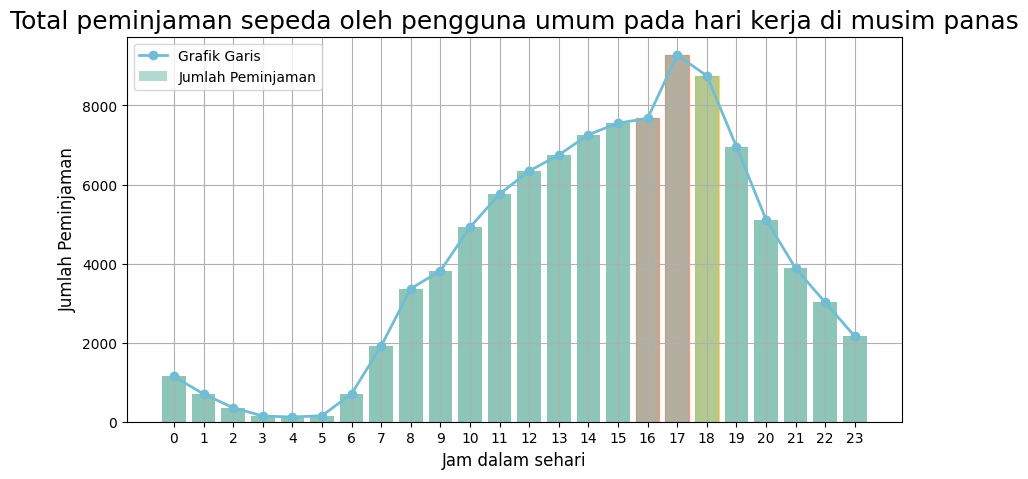

In [52]:
result_sorted = result.sort_values(by='casual_user', ascending=False)
highlight_color = ['#FF5733', '#FFC300', '#FF5733']
highlight_index = result_sorted.index[:3]

plt.figure(figsize=(10,5))
bars = plt.bar(result.index, result["casual_user"], color='#69b3a2', alpha=0.5, align='center')

for i in range(len(bars)):
    if i in highlight_index:
        bars[i].set_color(highlight_color[highlight_index.get_loc(i)])

plt.bar(result.index, result["casual_user"], color='#69b3a2', alpha =0.5, align='center', label='Jumlah Peminjaman')
plt.plot(result.index, result["casual_user"], marker='o', linewidth=2, color='#72BCD4', label='Grafik Garis')
plt.title("Total peminjaman sepeda oleh pengguna umum pada hari kerja di musim panas", fontsize=18)
plt.xlabel('Jam dalam sehari', fontsize=12)
plt.ylabel('Jumlah Peminjaman', fontsize=12)
plt.xticks(np.arange(24), fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.grid(True)
plt.show()

Dapat dilihat bahwa pada hari kerja di musim panas, pengguna umum paling banyak meminjam sepeda di sore hari dari sekitaran jam 16.00-18.00 dengan puncaknya adalah pada pukul 17.00.

In [54]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,Spring,2011,1,0,6,False,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,1,0,0,False,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,1,0,1,True,Clear/Few clouds,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,1,0,2,True,Clear/Few clouds,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,1,0,3,True,Clear/Few clouds,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [55]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,Spring,2011,1,0,0,6,False,Clear/Few clouds,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,1,1,0,6,False,Clear/Few clouds,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,1,2,0,6,False,Clear/Few clouds,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,1,3,0,6,False,Clear/Few clouds,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,1,4,0,6,False,Clear/Few clouds,0.24,0.2879,0.75,0.0,0,1,1


In [56]:
all_df = pd.merge(
    left = day_df,
    right = hour_df,
    how = "left",
    left_on = "instant",
    right_on = "instant"
)
all_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_user_y,registered_user_y,total_user_y
0,1,2011-01-01,Spring,2011,1,0,6,False,Misty/Cloudy,0.344167,...,6,False,Clear/Few clouds,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,Spring,2011,1,0,0,False,Misty/Cloudy,0.363478,...,6,False,Clear/Few clouds,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,Spring,2011,1,0,1,True,Clear/Few clouds,0.196364,...,6,False,Clear/Few clouds,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,Spring,2011,1,0,2,True,Clear/Few clouds,0.200000,...,6,False,Clear/Few clouds,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,Spring,2011,1,0,3,True,Clear/Few clouds,0.226957,...,6,False,Clear/Few clouds,0.24,0.2879,0.75,0.0,0,1,1


In [57]:
all_df.to_csv("all_data.csv", index=False)

## Conclusion

- Dari visualisasi menggunakan linechart, terlihat bahwa jumlah peminjaman sepeda cenderung tinggi saat kondisi cuaca sedang cerah atau berawan (Clear/Few clouds), sementara jumlahnya menurun drastis saat kondisi cuaca buruk seperti hujan ringan atau salju (Light Rain/Snow), dan sangat sedikit saat kondisi cuaca sedang hujan besar atau badai salju (Heavy Rain/Snow/Fog). Ini menunjukkan bahwa kondisi cuaca berpengaruh signifikan terhadap jumlah peminjaman sepeda pada hari kerja.
- Dari histogram yang divisualisasikan, terlihat bahwa pada hari kerja di musim panas, pengguna umum paling banyak meminjam sepeda di sore hari sekitar jam 16.00-18.00, dengan puncaknya terjadi pada pukul 17.00. Hal ini menunjukkan bahwa pada musim panas, saat cuaca cenderung hangat, orang cenderung lebih aktif memanfaatkan sepeda sebagai sarana transportasi.